<a href="https://colab.research.google.com/github/dinilsonpedroza/Jupyter/blob/main/Piketty.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

ENEM 2021 - Quando a taxa de remuneração do capital excede substancialmente a taxa de crescimento da economia, pela lógica, a riqueza herdada aumenta mais rápido do que a renda e a produção. Então, basta aos herdeiros poupar uma parte limitada da renda de seu capital para que ele cresça mais rápido do que a economia como um todo. Sob essas condições, é quase inevitável que a riqueza herdada supere a riqueza constituída durante uma vida de trabalho, e que a concentração do capital atinja níveis muito altos. PIKETTY, T. O capital no século XXI. Rio de Janeiro Intrínseca, 2014 (adaptado). 

Vamos tratar essa pergunta analisando sua evidência empírica. Vamos coletar, por raspagem, dados sobre a taxa de crescimento do PIB e sobre taxa de retorno do capital financeiro.

In [ ]:
import pandas as pd
from matplotlib import pyplot as plt
from urllib.request import urlopen ### Bibliotecas que serão usadas no trabalho.

In [ ]:
def get_data_bcb(código): ### Aqui estamos criando uma função para raspagem usando *urlopen*.
    url = "http://api.bcb.gov.br/dados/serie/bcdata.sgs.{}/dados?formato=json".format(código) ### Endereço com espaço {} para a tabela específica.
    html = urlopen(url).read() ### Acionando a função de raspagem e leitura dos dados (*read*).
    df = pd.read_json(html) ### Acionando a função do *Pandas que faz a leitura em **JSON** já criando um data frame.
    df.index = pd.to_datetime(df['data']) ### No data frame que será criado, o *Index* assumirá os valores da data.
    df = df['valor'] ### Selecionando apenas os valores para o data frame.
    return df ### O retorno ou resultado da função é o próprio data frame.

**PIB**
---

In [ ]:
PIB = get_data_bcb(24363) ### Nível de atividade mensal SGS do Banco Central. Note que estamos dando o nome de "PIB" ao df criado.
PIB.head() ### O IBC-Br é um indicador do Banco Central com estimativa de PIB.

data
2003-01-01     96.15
2003-01-02     98.67
2003-01-03    103.41
2003-01-04    102.19
2003-01-05    100.30
Name: valor, dtype: float64

In [ ]:
PIBv = PIB.diff(1)

In [ ]:
PIBv.head()

data
2003-01-01     NaN
2003-01-02    2.52
2003-01-03    4.74
2003-01-04   -1.22
2003-01-05   -1.89
Name: valor, dtype: float64

In [ ]:
PIBv = PIBv.loc['2011-01-03':] ### Deixando essa série do mesmo tamanho da série da taxa de juros.

In [ ]:
PIBv

data
2011-01-03    8.75
2011-01-04   -5.04
2011-01-05    3.34
2011-01-06   -1.48
2011-01-07    3.44
              ... 
2021-01-05   -2.06
2021-01-06    0.61
2021-01-07    5.82
2021-01-08   -1.34
2021-01-09   -2.73
Name: valor, Length: 127, dtype: float64

**TAXA DE JUROS**
---

In [ ]:
txj = get_data_bcb(25433) ### Pegando a série do PIB nominal no SGS do Banco Central. Note que estamos dando o nome de "PIB" ao df criado.
txj.head() ### O IBC-Br é um indicador do Banco Central com estimativa de PIB.

data
2011-01-03    2.04
2011-01-04    2.07
2011-01-05    2.07
2011-01-06    2.05
2011-01-07    2.07
Name: valor, dtype: float64

In [ ]:
txj

data
2011-01-03    2.04
2011-01-04    2.07
2011-01-05    2.07
2011-01-06    2.05
2011-01-07    2.07
              ... 
2021-01-05    1.53
2021-01-06    1.53
2021-01-07    1.56
2021-01-08    1.61
2021-01-09    1.65
Name: valor, Length: 127, dtype: float64

Vamos comparar os valores médios das duas séries.

In [ ]:
PIBv.mean()

0.02385826771653544

In [ ]:
txj.mean()

1.8702362204724416

**GRÁFICO**
---

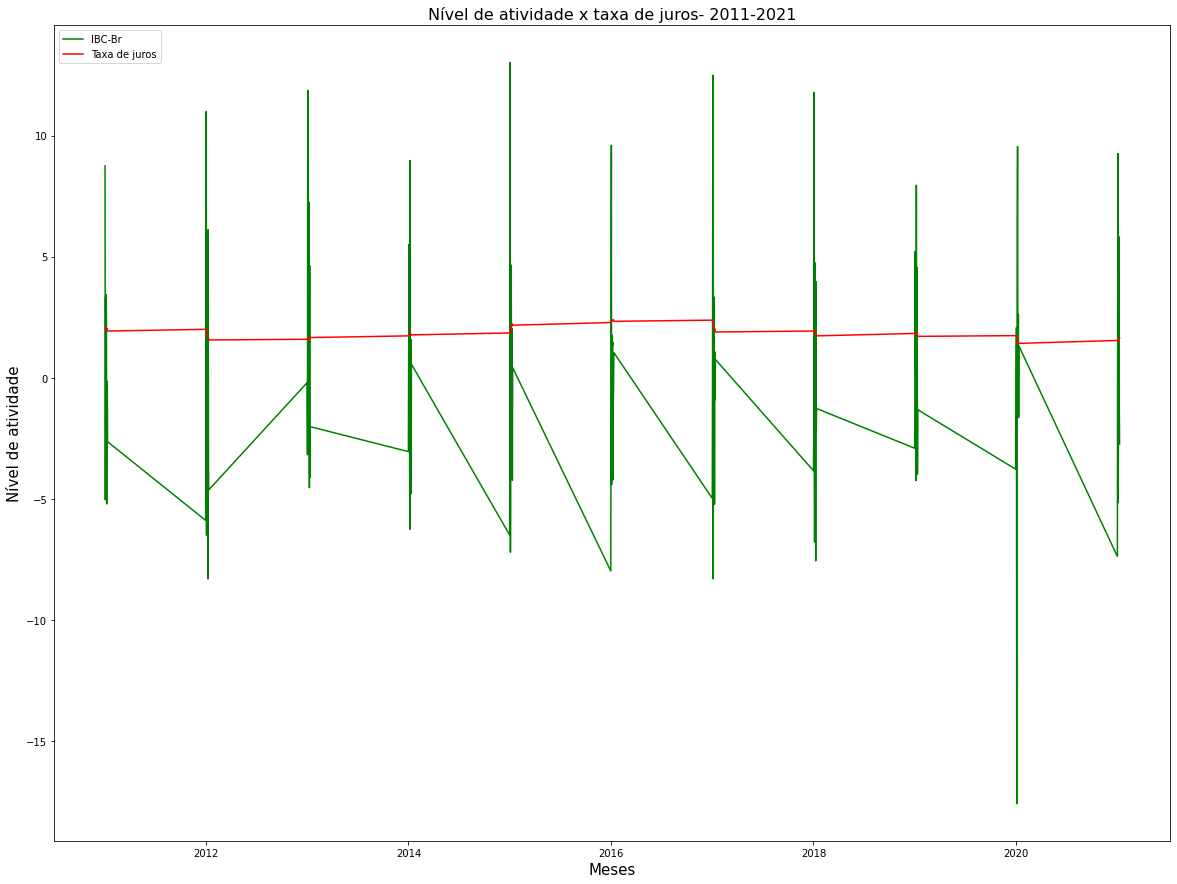

In [ ]:
plt.rcParams['figure.figsize'] = (20,15)
plt.title('Nível de atividade x taxa de juros- 2011-2021',fontsize = 16)
plt.plot(PIBv, label = 'IBC-Br', c= 'g')
plt.plot(txj, label = 'Taxa de juros', c= 'r')
plt.ylabel("Nível de atividade",fontsize = 15)
plt.xlabel('Meses',fontsize = 15)
plt.legend(loc = 'upper left')
